Read 2097152 bytes, array size: 1048576


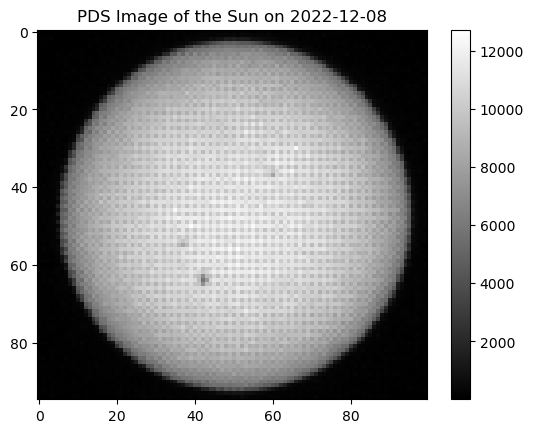

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Path to the IMG file
img_file = '/path/to/file/ZL7_0640_0723762070_398RAD_N0310000ZCAM01002_1100LMA01.IMG'

# Offset value taken from the '.xml' file (metadata) to skip.
offset = 49152

# Image dimensions ( taken from XML metadata)
width, height = 1024, 1024

# Data type from the XML metadata ('SignedMSB2' = big-endian 2-byte signed integers)
dtype = '>i2'  # Big-endian 2-byte signed integer

try:
    # Read the IMG file
    with open(img_file, 'rb') as file:
        # Skip the offset and read the remaining data
        file.seek(offset)
        image_data = file.read()

    # Convert the image data from bytes to a NumPy array
    image_array = np.frombuffer(image_data, dtype=dtype)

    # Debug: Check the size of the raw data
    print(f"Read {len(image_data)} bytes, array size: {image_array.size}")

    # Ensure that the array has the correct size before reshaping
    if image_array.size != width * height:
        raise ValueError(f"Unexpected data size: {image_array.size}, expected {width * height}")

    # Reshape the array to the correct dimensions (1024x1024)
    image_array = image_array.reshape((height, width))

    # Apply scaling factor and value offset from the XML metadata
    scaling_factor = 0.388140589
    value_offset = 6.89485836
    image_array = image_array * scaling_factor + value_offset

    # Choose the required area
    center_square = image_array[495:590,488:588]
    #print(center_square)

    # Display the middle 256x256 square using matplotlib
    plt.imshow(center_square, cmap='gray')
    plt.colorbar()
    plt.title('PDS Image of the Sun on 2022-12-08')
    plt.show()

except Exception as e:
    print(f"Error: {e}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Path to the IMG file
img_file = '/path/to/file/ZL7_0640_0723762070_398RAD_N0310000ZCAM01002_1100LMA01.IMG'

# Offset value taken from the '.xml' file (metadata) to skip.
offset = 49152

# Image dimensions ( taken from XML metadata)
width, height = 1024, 1024

# Data type from the XML metadata ('SignedMSB2' = big-endian 2-byte signed integers)
dtype = '>i2'  # Big-endian 2-byte signed integer

try:
    # Read the IMG file
    with open(img_file, 'rb') as file:
        # Skip the offset and read the remaining data
        file.seek(offset)
        image_data = file.read()

    # Convert the image data from bytes to a NumPy array
    image_array = np.frombuffer(image_data, dtype=dtype)

    # Debug: Check the size of the raw data
    print(f"Read {len(image_data)} bytes, array size: {image_array.size}")

    # Ensure that the array has the correct size before reshaping
    if image_array.size != width * height:
        raise ValueError(f"Unexpected data size: {image_array.size}, expected {width * height}")

    # Reshape the array to the correct dimensions (1024x1024)
    image_array = image_array.reshape((height, width))

    # Apply scaling factor and value offset from the XML metadata
    scaling_factor = 0.388140589
    value_offset = 6.89485836
    image_array = image_array * scaling_factor + value_offset

    # Choose the required area
    center_square = image_array[495:590, 488:588]

    # Display the middle square using matplotlib
    plt.imshow(center_square, cmap='gray')
    plt.colorbar()
    plt.title('PDS Image of the Sun on 2022-12-08')
    ax = plt.gca()
    # List of coordinates for sunspots
    circle_coordinates = [(64, 42), (55, 37), (37, 60)]  # Add more (x, y) coordinates as needed

    # Loop to add multiple circles
    for coord in circle_coordinates:
        circle_x, circle_y = coord
        # Create a new circle for each coordinate
        circle = plt.Circle((circle_y, circle_x), radius=4, color='red', fill=False, linewidth=2)
        ax.add_patch(circle)

    # Display the plot with multiple circles
    plt.show()
except Exception as e:
    print(f"Error: {e}")